In [74]:
from keras.applications.xception import Xception, preprocess_input, decode_predictions
from cleverhans.tf2.attacks.fast_gradient_method import fast_gradient_method
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [101]:
model = Xception(weights='imagenet')

data_path = "../vid2img/frames/mug/mug_frame_0.jpg"
# img array
img_pil = tf.keras.preprocessing.image.load_img(data_path, target_size=(299, 299))

In [75]:
def generate_adversarial_example_cleverhans(model, input_image, target_class, epsilon=0.01):

    # add batch dimension
    input_image = np.expand_dims(input_image, axis=0)
    input_tensor = tf.convert_to_tensor(input_image, dtype=tf.float32)
    adv_example = fast_gradient_method(model, input_tensor, epsilon, np.inf)
    adv_example = np.clip(adv_example.numpy(), 0, 255)
    
    return adv_example

In [102]:
adv_image = generate_adversarial_example_cleverhans(model, img_pil, 1, epsilon=1)

In [82]:
def visualise_tf_img(img, type='pil'):
    if type == 'path':
        img = tf.keras.preprocessing.image.load_img(img)
    elif type == 'array':
        # remove extra dimension if batched
        if len(img.shape) == 4:
            img = np.squeeze(img, axis=0)
            img = tf.keras.preprocessing.image.array_to_img(img)
    
    plt.imshow(img)
    # remove the x and y ticks
    plt.xticks([])
    plt.yticks([])
    plt.show()
      

In [ ]:
# count pixel values in the image
def count_pixel_values(img):
    img = np.asarray(img)
    unique, counts = np.unique(img, return_counts=True)
    return dict(zip(unique, counts))

print(count_pixel_values(adv_image))

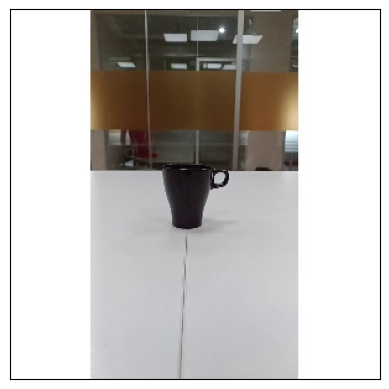

In [104]:

visualise_tf_img(img_pil, type='pil') 

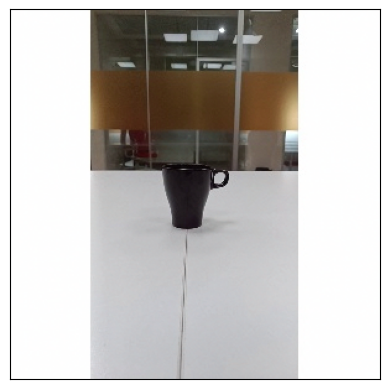

In [103]:
# visualise the adversarial example
visualise_tf_img(adv_image, type='array') 

In [105]:
# predict img and adv_img with the model

def predict_img(model, img):
    
    if len(img.shape) == 3:
        img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    preds = model.predict(img)
    return decode_predictions(preds, top=5)[0]


# convert img to array
img_arr = tf.keras.preprocessing.image.img_to_array(img_pil)
print(predict_img(model, img_arr))

1/1 [==============================] - 1s 1s/step
[('n02747177', 'ashcan', 0.101483114), ('n04550184', 'wardrobe', 0.10079401), ('n04367480', 'swab', 0.0597657), ('n04553703', 'washbasin', 0.054336652), ('n04239074', 'sliding_door', 0.050392486)]


In [106]:
print(predict_img(model, adv_image))

1/1 [==============================] - 0s 136ms/step
[('n04239074', 'sliding_door', 0.14543007), ('n02747177', 'ashcan', 0.13685827), ('n04367480', 'swab', 0.06529513), ('n04550184', 'wardrobe', 0.061093815), ('n02909870', 'bucket', 0.049452353)]
